# Title: Time series analysis of pm2.5 alongwith prediction model building 

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#importing libraries to use them ahead
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv('Ashish_lstm.csv',index_col='Date',parse_dates=True)
#Reading the data from the field
df = pd.read_csv('lstm_im.csv', index_col='date',parse_dates=True)
df.index.freq='H'
# df = pd.read_csv('lstm_im.csv', parse_dates=True, index_col='date',names=['date', 'pm2.5'], header=None, sep=',')

In [4]:
df.drop(df.iloc[:, 0:7], inplace = True, axis = 1) #This line removes the columns not required by us to predict in a univariate time series field
df.drop(df.tail(6).index, inplace = True) # Dropping the unnecesary additional imformation at the tail.
df

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1
31-12-2018 21:00,8.9


In [5]:
# df.head()

In [6]:
# df.tail(10)

In [7]:
# df.info()

In [8]:
# print("Rows    :" ,df.shape[0])
# print("columns :" ,df.shape[1])
# print("\nFeatures :", df.columns.tolist())
# print("\nMissing Values :",df.isnull().any())
# print("\nUnique Values :",df.nunique())

In [9]:
df.isnull().sum() #The total number of pm2.5 values which are zero actually 

pm2.5    742
dtype: int64

In [10]:
df[df['pm2.5'].isnull()] #Listing all the nan values of pm2.5

,pm2.5
date,
02-01-2018 21:00,NaN
03-01-2018 00:00,NaN
15-01-2018 00:00,NaN
21-01-2018 15:00,NaN
01-02-2018 10:00,NaN
...,...
13-09-2018 12:00,NaN
13-09-2018 13:00,NaN
13-09-2018 14:00,NaN


In [11]:
# df[df['pm2.5'].isnull()].count()

In [12]:
df.tail(12)

,pm2.5
date,
31-12-2018 12:00,9.2
31-12-2018 13:00,9.6
31-12-2018 14:00,8.1
31-12-2018 15:00,8.7
31-12-2018 16:00,5.3
31-12-2018 17:00,9.9
31-12-2018 18:00,16.3
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1


In [13]:
# df

In [14]:

# import plotly.express as px
# fig = px.line(df, y='pm2.5', title='pm2.5 with slider')

# fig.update_xaxes(
#     rangeslider_visible = True,
#     rangeselector=dict(
#         buttons=list([
#             dict(step="all")
#         ]
#         )))  
# fig.show()

<AxesSubplot:xlabel='date'>

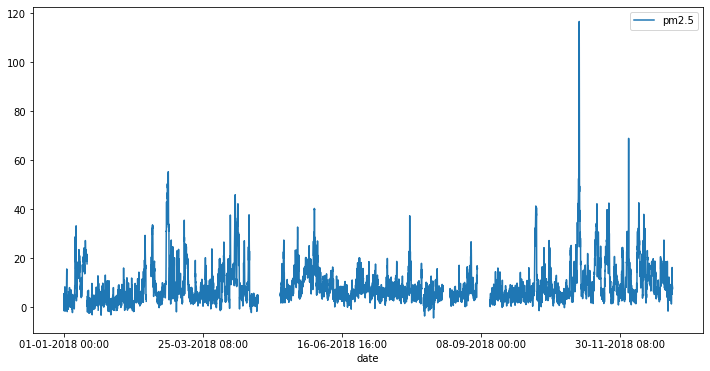

In [15]:
df.plot(y='pm2.5', figsize=(12,6))

In [16]:
# df = df.set_index['date']

In [17]:
# df.loc['01-01-2018 00:00':'01-02-2018 00:00']
df[0:745]

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-01-2018 20:00,2.6
31-01-2018 21:00,4.3
31-01-2018 22:00,3.5


In [18]:
df_na = df.copy()
# df_na = df_na.dropna()
df_na = df_na.dropna(subset=['pm2.5']) # we use this to drop the nan values we could have interpolate the null fiels but it will not have a large impact on the data 
df_na

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1
31-12-2018 21:00,8.9


<AxesSubplot:xlabel='date'>

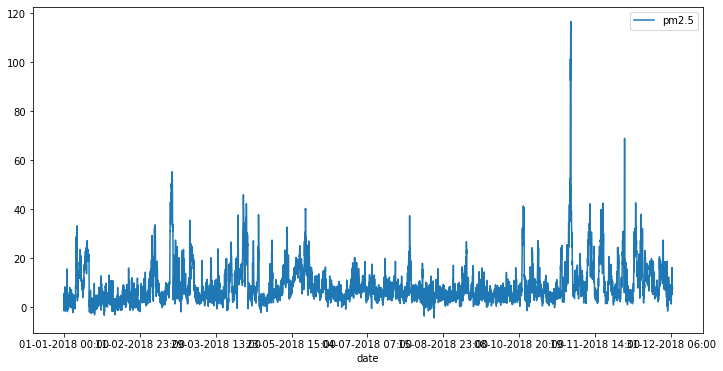

In [19]:
df_na.plot(figsize=(12,6),y='pm2.5')

 ### Now we will check for autocorrelation to know for seasonality 

The Autocorrelation plot for the data is:


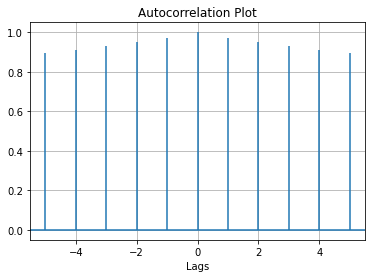

In [20]:
# pd.plotting.autocorrelation_plot(df_na['01-01-2018 00:00':'31-12-2018 23:00']['pm2.5'])
plt.title("Autocorrelation Plot")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(df_na['pm2.5'], maxlags = 5)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

In [21]:
# df_na = pd.DataFrame(
#         {'Hours': pd.date_range('01-01-2018 00:00', '31-12-2018 23:00', freq='1H', closed='left')}
#      )
# df_na.head()
# df_na.tail()

# df_na.drop(df_na.tail(4).index,
#         inplace = True)
df_na
df_na.index.freq='H'

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

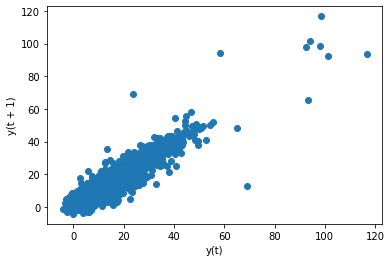

In [22]:
pd.plotting.lag_plot(df_na,lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

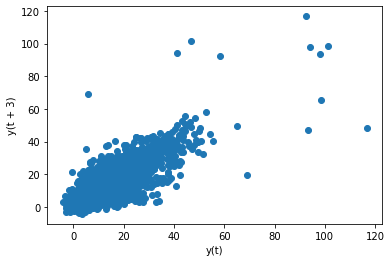

In [23]:
pd.plotting.lag_plot(df_na['pm2.5'],lag=3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

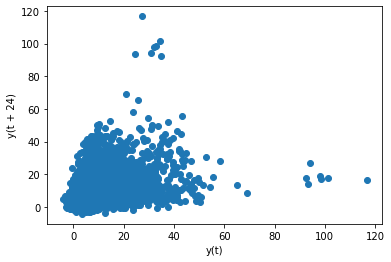

In [24]:
pd.plotting.lag_plot(df_na['pm2.5'],lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 48)'>

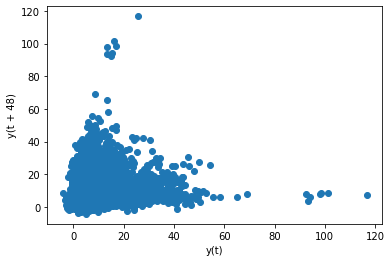

In [25]:
pd.plotting.lag_plot(df_na['pm2.5'],lag=48)

In [26]:
# from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
# results = seasonal_decompose(df_na['pm2.5'])
# results.plot();

In [28]:
len(df_na)

8018

In [29]:
df_na

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1
31-12-2018 21:00,8.9


In [30]:
# df_na.drop(columns =['Unnamed: 0', 'site', 'code','no2','no2_UT','pm10','pm10_UT'])
# df_na.drop(df.iloc[:, 0:7], inplace = True, axis = 1)
# df_na

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_na = scaler.fit_transform(np.array(df_na).reshape(-1,1))

In [32]:
df_na

array([[0.08181818],
       [0.04876033],
       [0.04958678],
       ...,
       [0.10909091],
       [0.09669421],
       [0.10082645]])

In [33]:
train_data = df_na[0:7000] #splitting the sample data into train data 
test_data = df_na[7000:len(df_na),:1] #splitting sample data into test data 

In [34]:
len(train_data),len(test_data)

(7000, 1018)

In [35]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #the lag we will use to actually predict the next data point and to also set the model.
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [37]:
print(X_train)

[[0.08181818 0.04876033 0.04958678 ... 0.06280992 0.06115702 0.0677686 ]
 [0.04876033 0.04958678 0.04214876 ... 0.06115702 0.0677686  0.0785124 ]
 [0.04958678 0.04214876 0.05454545 ... 0.0677686  0.0785124  0.09504132]
 ...
 [0.1661157  0.1785124  0.20165289 ... 0.10247934 0.09008264 0.08760331]
 [0.1785124  0.20165289 0.18760331 ... 0.09008264 0.08760331 0.07355372]
 [0.20165289 0.18760331 0.19504132 ... 0.08760331 0.07355372 0.07603306]]


In [38]:
print(X_test)

[[0.08181818 0.06280992 0.08842975 ... 0.18016529 0.22396694 0.24132231]
 [0.06280992 0.08842975 0.08099174 ... 0.22396694 0.24132231 0.27603306]
 [0.08842975 0.08099174 0.09669421 ... 0.24132231 0.27603306 0.30165289]
 ...
 [0.13471074 0.16859504 0.17520661 ... 0.11735537 0.17024793 0.10826446]
 [0.16859504 0.17520661 0.16694215 ... 0.17024793 0.10826446 0.10247934]
 [0.17520661 0.16694215 0.19008264 ... 0.10826446 0.10247934 0.10909091]]


In [39]:
# df_na.head(),df_na.tail()
print(X_train.shape), print(y_train.shape)

(6899, 100)
(6899,)


(None, None)

In [40]:
# df_na.head(),df_na.tail()
print(X_test.shape), print(y_test.shape)

(917, 100)
(917,)


(None, None)

### Creating stacked lstm

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# from 

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)

In [ ]:
print(hist.history.keys())

In [ ]:
pyplot.plot(hist.history['loss'])
pyplot.plot(hist.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
# import tensorflow as tf

In [ ]:
# tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_na)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_na)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_na)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_na))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
plt.plot(scaler.inverse_transform(df_na))

In [ ]:
plt.plot(trainPredictPlot)


In [ ]:
plt.plot(testPredictPlot)


In [ ]:
len(test_data)

In [ ]:
x_input=test_data[918:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 70 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<70):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,171)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df_na)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df_na[7918:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
# plt.plot(day_new,scaler.inverse_transform(df_na[7518:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df_na.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)

In [ ]:
len(df3)

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# df

In [ ]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%d-%m-%y %H:%M ') for dt in 
       datetime_range(datetime(2019, 1, 1, 0), datetime(2019, 1, 3, 22), 
       timedelta(minutes=60))]

print(dts)

In [ ]:
len(dts)
# type(dts)
# dts_arr = np.array(dts)

In [ ]:
date_ind = df.index.values
date_ind = date_ind.tolist()
# type(date_ind)
len(date_ind)


In [ ]:
date_ind = date_ind+dts
len(date_ind)

In [ ]:
data_pm2 = df['pm2.5']
data_pm2 = data_pm2.tolist()
type(data_pm2)

In [ ]:
data_pm2_end = df3[8018:8088]
# len(data_pm2_end)
data_pm2_end

In [ ]:
# data_pm2 = data_pm2 + data_pm2_end
data_pm2.extend(data_pm2_end)
len(data_pm2)

In [ ]:
# array_date = np.array(date_ind)
# array_data = np.array(data_pm2)
type(data_pm2)

In [ ]:
# _, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
# _, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
# print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

In [ ]:

# import plotly.express as px
# fig = px.line(df3, y='pm2.5', title='pm2.5 with slider')

# fig.update_xaxes(
#     rangeslider_visible = True,
#     rangeselector=dict(
#         buttons=list([
#             dict(step="all")
#         ]
#         )))  
# fig.show()

### The end

## This was previous version

In [ ]:
# scaler.fit(train)
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [ ]:
# scaled_train[:10]

In [ ]:
# from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# # define generator
#  n_input = 5
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# X,y = generator[0]
# print(f'Given the Array: \n{X.flatten()}')
# print(f'Predict this y: \n {y}')

In [ ]:
# X.shape

In [ ]:
# # We do the same thing, but now instead for 12 hours
# n_input = 3
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM

In [ ]:
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [ ]:
# model.summary()

In [ ]:
# fit model
# model.fit(generator,epochs=50)

In [ ]:
# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
# last_train_batch = scaled_train[-12:]

In [ ]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
# model.predict(last_train_batch)

In [ ]:
# scaled_test[0]

In [ ]:
# test_predictions = []

# first_eval_batch = scaled_train[-n_input:]
# current_batch = first_eval_batch.reshape((1, n_input, n_features))

# for i in range(len(test)):
    
#     # get the prediction value for the first batch
#     current_pred = model.predict(current_batch)[0]
    
#     # append the prediction into the array
#     test_predictions.append(current_pred) 
    
#     # use the prediction to update the batch and remove the first value
#     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
# test_predictions

In [ ]:
# test.head()

In [ ]:
# true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# test['Predictions'] = true_predictions

In [ ]:
# test.head()

In [ ]:
# test

In [ ]:
# test.plot(figsize=(14,5))

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse=sqrt(mean_squared_error(test['pm2.5'],test['Predictions']))
# print(rmse)